In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


## Charger mon Dataset
- charger le dataset IRIS
- retirer les plantes de type "setosa"

In [25]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

# retirer les lignes avec la target 2
iris_df = iris_df[iris_df.target != 1]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Représentation graphique de mon dataset avec Seaborn
- Afficher un nuage de points avec la fonction `pairplot` de Seaborn

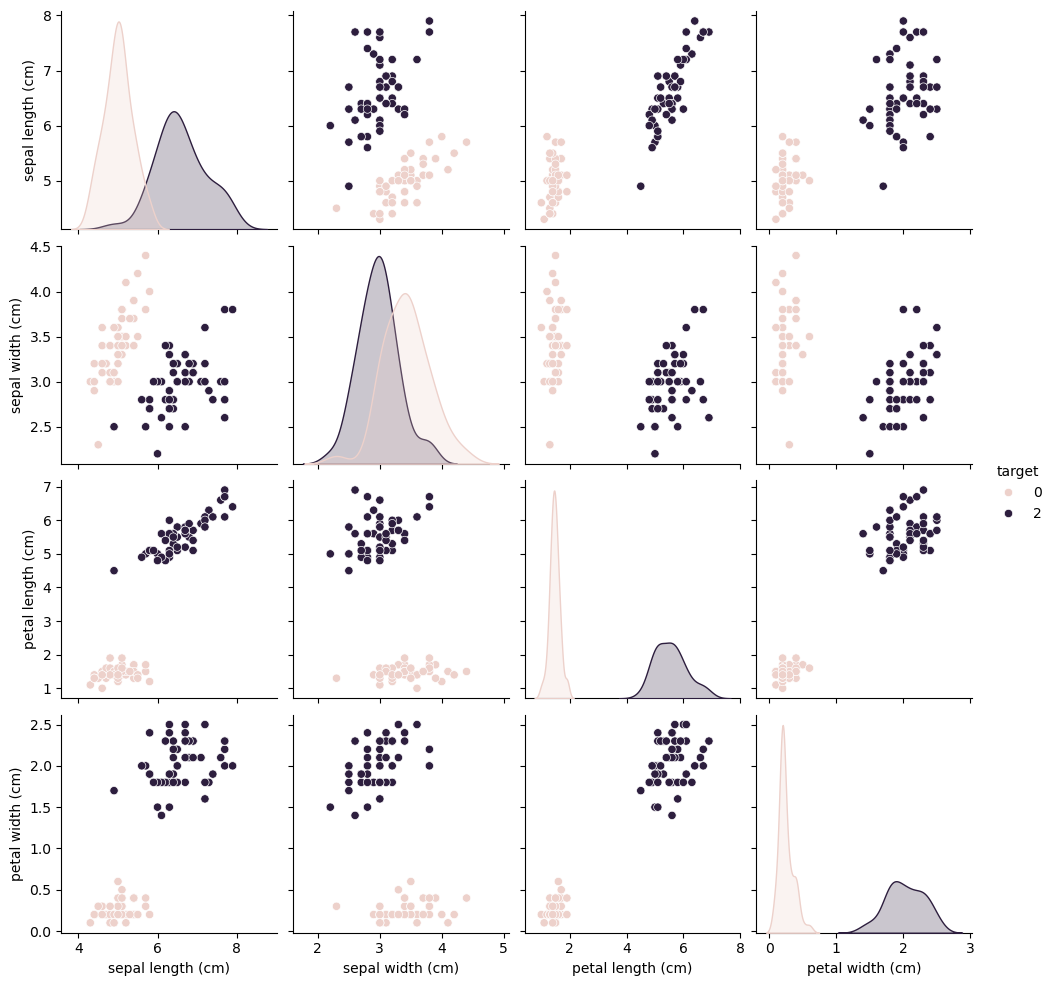

In [26]:
sns.pairplot(iris_df, hue='target')
plt.show()

## Diviser le dataset en 2 parties 80% pour l'entrainement et 20% pour le test
- X_train, X_test, y_train, y_test
- nous utilisons la fonction train_test_split de sklearn

In [27]:
x_train, x_test, y_train, y_test = train_test_split(iris_df.drop('target', axis=1), iris_df.target, test_size=0.2, random_state=42)
y_train

105    2
138    2
26     0
42     0
119    2
      ..
110    2
121    2
14     0
142    2
101    2
Name: target, Length: 80, dtype: int64

## Entrainement de mon modèle de classification
- Nous utilisons le modèle de classification KNeighborsClassifier de sklearn
- Nous utilisons la fonction fit pour entrainer le modèle


In [28]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Evaluation de mon modèle
- Nous utilisons la fonction score pour évaluer le modèle
- Nous utilisons la fonction predict pour prédire les valeurs de test

In [29]:
predictions = model.predict(x_test)
# y'-> predictions | valeurs prédites par le modèle
# y -> y_test | valeurs réelles fournient par le dataset
y_pred = accuracy_score(y_test, predictions) # faire la comparaison entre les valeurs prédites et les valeurs réelles
print(f"Accuracy: {y_pred}")

Accuracy: 1.0


## Representer graphiquement les résultats
- Nous utilisons seaborn pour représenter les résultats

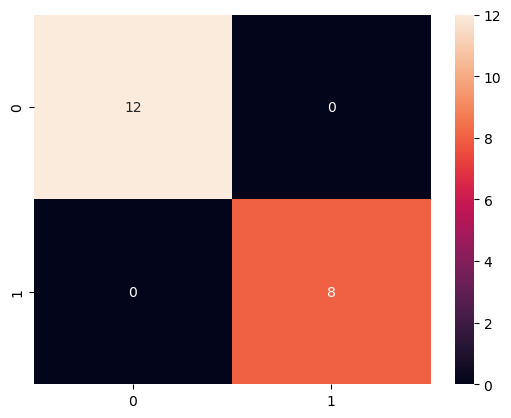

In [30]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
plt.show()